<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [3]:
import pandas as pd
paro = pd.read_csv("D:/KL/NLP/Taller 11/tweets.csv")
paro.head()

,tweets,date
0,"Paro nacional: Duque in english, ¿el president...",2021-05-27 11:02:37
1,#ParoNacional27M\nA organizarnos y resistir si...,2021-05-27 10:57:44
2,Claudia López entregó informe de violaciones d...,2021-05-27 10:55:02
3,Paro nacional: Policía capturó a cuatro person...,2021-05-27 10:50:43
4,#VIDEO Paro Nacional: testimonios de abuso pol...,2021-05-27 10:35:00


In [9]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')

2021-05-27 06:30:32,283 loading file C:\Users\robin\.flair\models\sentiment-en-mix-distillbert_4.pt


In [10]:
def sent_flair(texto):
    frase = Sentence(texto)
    classifier.predict(frase)
    result = frase.labels[0]
    label = result.value
    score = result.score
    if label == 'NEGATIVE':
        return score * -1
    return score

In [18]:
pd.set_option('display.max_colwidth', None)
paro['sent_flair'] = paro['tweets'].apply(lambda val: sent_flair(val))
paro.head()

,tweets,date,sent_flair
0,"Paro nacional: Duque in english, ¿el presidente en drogas? via @lasillavacia https://t.co/RO96JWSgtD",2021-05-27 11:02:37,-0.902476
1,#ParoNacional27M\nA organizarnos y resistir sin miedo\nViva el paro nacional!!! https://t.co/RjV4OJBZ71,2021-05-27 10:57:44,0.997762
2,Claudia López entregó informe de violaciones de DD. HH durante el Paro Nacional a la ONU. \nhttps://t.co/Fy9eR3CSou https://t.co/0GFSo0sMcW,2021-05-27 10:55:02,0.924477
3,Paro nacional: Policía capturó a cuatro personas acusadas de vandalismo en Portal Américas #MañanasBLU https://t.co/ecUYqRVDnh,2021-05-27 10:50:43,-0.886072
4,#VIDEO Paro Nacional: testimonios de abuso policial durante las manifestaciones\nhttps://t.co/ha8oohxCGi https://t.co/1ZhxUrJirA,2021-05-27 10:35:00,0.931739


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [32]:
tweetN = paro.loc[paro["sent_flair"].idxmin()]
print(f"tweet negativo: {tweetN.tweets}")
print(f"score: {tweetN.sent_flair}")

tweet negativo: @asantosrubino “Pero que hptas, que viva el paro nacional”... *Sarcasmo* (Aclaración por si las moscas)
score: -0.9992941617965698


In [31]:
tweetP = paro.loc[paro["sent_flair"].idxmax()]
print(f"tweet positivo: {tweetP.tweets}")
print(f"score: {tweetP.sent_flair}")

tweet positivo: Nacional decidió unirse al paro nacional #respect
score: 0.9989950060844421


###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [34]:
paro['sentimiento'] = " "
paro.loc[paro['sent_flair']>0, 'sentimiento'] = 'Positivo'
paro.loc[paro['sent_flair']<0, 'sentimiento'] = 'Negativo'
paro.loc[paro['sent_flair']==0, 'sentimiento'] = 'Neutro'
paro.head()

,tweets,date,sent_flair,sentimiento
0,"Paro nacional: Duque in english, ¿el presidente en drogas? via @lasillavacia https://t.co/RO96JWSgtD",2021-05-27 11:02:37,-0.902476,Negativo
1,#ParoNacional27M\nA organizarnos y resistir sin miedo\nViva el paro nacional!!! https://t.co/RjV4OJBZ71,2021-05-27 10:57:44,0.997762,Positivo
2,Claudia López entregó informe de violaciones de DD. HH durante el Paro Nacional a la ONU. \nhttps://t.co/Fy9eR3CSou https://t.co/0GFSo0sMcW,2021-05-27 10:55:02,0.924477,Positivo
3,Paro nacional: Policía capturó a cuatro personas acusadas de vandalismo en Portal Américas #MañanasBLU https://t.co/ecUYqRVDnh,2021-05-27 10:50:43,-0.886072,Negativo
4,#VIDEO Paro Nacional: testimonios de abuso policial durante las manifestaciones\nhttps://t.co/ha8oohxCGi https://t.co/1ZhxUrJirA,2021-05-27 10:35:00,0.931739,Positivo


In [43]:
aggparo = pd.DataFrame(paro.sentimiento.value_counts()).reset_index()
aggparo.columns = ['sentimiento', 'tweets']
aggparo

,sentimiento,tweets
0,Positivo,68
1,Negativo,32


###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

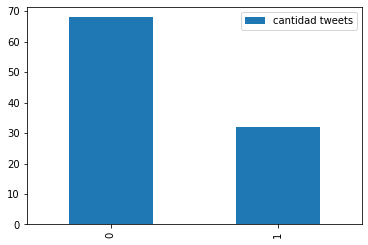

In [39]:
aggparo.plot(kind = 'bar')

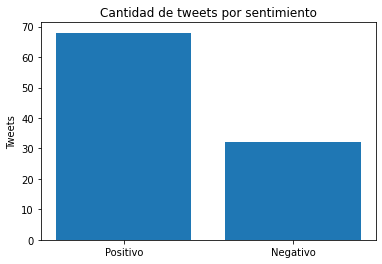

In [45]:
fig, ax = plt.subplots()
ax.set_ylabel('Tweets')
ax.set_title('Cantidad de tweets por sentimiento')
plt.bar(aggparo['sentimiento'], aggparo['tweets'])
plt.show()